## Identification

- Nom : Jacob-Simard
- Prénom : Raphaël
- Code permanent : JACR26038907
- Cours : INF600f - H2022
- Équipe : 9

In [13]:
import numpy as np
import skimage
import skimage.transform
import imageio
import matplotlib.pyplot as plt
import math
# Ajoutez d'autres modules au besoin

EX1_IMG1 = "tp1_ex1_img1.tiff"
EX1_IMG2 = "tp1_ex1_img2.tiff"
EX2_LOGO = "tp1_ex2_logo.tiff"
EX2_PROFIL = "profil_raphaeljacobsimard.jpg"
EX2_PROFIL_UQAM = "profil_raphaeljacobsimard_uqam.jpg"
EX3_IMG = "tp1_ex3_livre_mystere.png"


# Exercice 1 : Imagerie de la rétine & Message secret
Les images à utiliser pour cet exercice sont `tp1_ex1_img1.tiff` et `tp1_ex1_img2.tiff`.

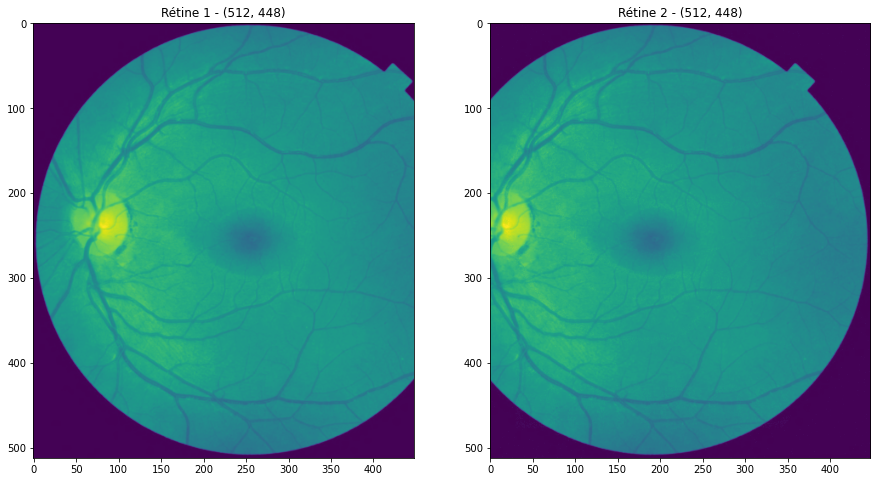

In [14]:
# Chargement des images

retine_img1 = imageio.imread(EX1_IMG1)
retine_img2 = imageio.imread(EX1_IMG2)


# affichage des images

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(retine_img1)
plt.title("Rétine 1 - " + str(retine_img1.shape))
plt.subplot(122)
plt.imshow(retine_img2)
plt.title("Rétine 2 - " + str(retine_img2.shape))
plt.show()

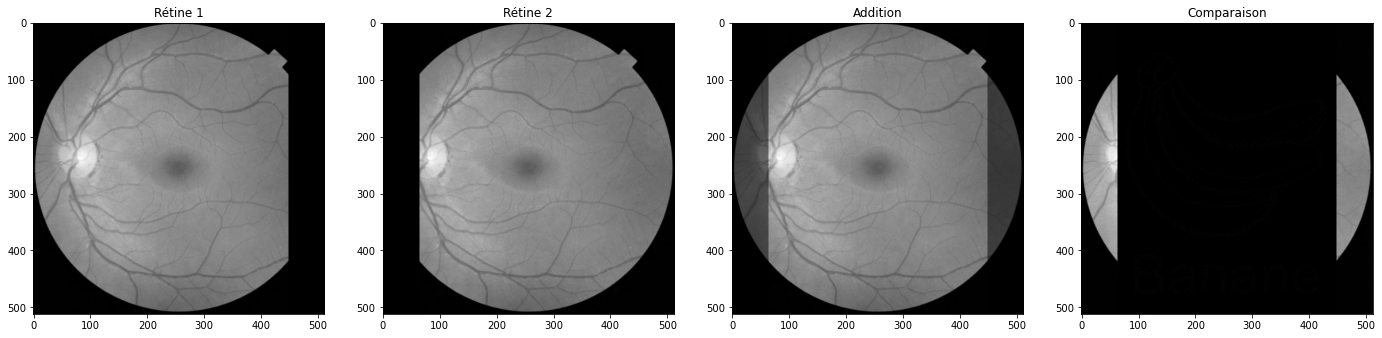

In [15]:
# Ajout de colonnes vides aux deux images pour pouvoir les aligner et les comparer.

z1 = np.zeros((512,64)) # 64 parce que 512 - 448
retine_img1_t = np.concatenate(( retine_img1,z1), axis=1)
retine_img2_t = np.concatenate((z1, retine_img2), axis=1)
concatenation_retines = retine_img1_t + retine_img2_t
comparaison_retines = skimage.util.compare_images(retine_img1_t, retine_img2_t)

# Affichage des 4 images

plt.figure(figsize=(24,10))
plt.subplot(141)
plt.imshow(retine_img1_t, cmap="gray")
plt.title("Rétine 1")
plt.subplot(142)
plt.imshow(retine_img2_t, cmap="gray")
plt.title("Rétine 2")
plt.subplot(143)
plt.imshow(concatenation_retines, cmap="gray")
plt.title("Addition")
plt.subplot(144)
plt.imshow(comparaison_retines, cmap="gray")
plt.title("Comparaison")
plt.show()



C'est presque invisible mais il y a quelque chose dans la quatrième image. On peut augmenter l'intensité pour mieux le voir.

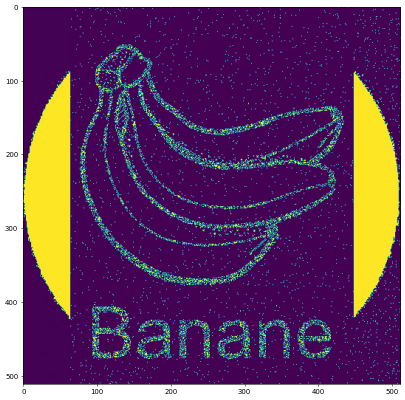

In [16]:
comparaison_retines[comparaison_retines > 1] = 255
plt.figure(figsize=(10,10), dpi=50)
plt.imshow(comparaison_retines)
plt.show()

### Question 1 : Pourquoi est-ce que le message secret est imperceptible à votre avis?

Le contraste entre le message et l'arrière-plan est tellement petit que l'oeil humain a de la difficulté à le distinguer lors de la comparaison (image numéro 4). De plus, le message était difficile à voir dans l'Image originale pour une raison similaire; l'intensité du message était trop basse pour affecter de façon perceptible l'image en avant-plan. Il est aussi possible que la présence de points aléatoires (du bruits) empêche le cerveau de bien distinguer la banane et les lettres, ces derniers étant des 'patterns'.


### Question 2 : Comment a été créée l'image contenant le message secret selon vous?

Le message secret était probablement une image en tant que telle pour laquelle l'intensité a été réduite au minimum. Cette image a ensuite été ajoutée à l'image de la rétine (soit avec un stack ou en additionnant les matrices numpy) qui avait elle aussi été modifiée(rongée pour forcer à faire un peu plus de manipulation).

# Exercice 2 : Avatar UQAM
- Vous devez utiliser l'image `tp1_ex2_logo.tiff` ainsi qu'une photo de vous-même pour cet exercice.

In [17]:
def param_sont_valides(input_shape:tuple[int], centre:tuple[int], taille_cible:int) -> bool:
    """
    Retourne la validité des paramètres.

    @param input_shape : Un tuple représentant les données de l'image à modifier.
    @param centre : Un tuple représentant le centre voulu pour créer l'image.
    @param taille_cible : La taille voulue de l'image.
    @return : True si les paramètres sont valide, False si autrement.
    """
    input_x, input_y, _ = input_shape
    centre_x, centre_y = centre
    return (
        (centre_x <= input_x and centre_y <= input_y) and
        (taille_cible <= input_x and taille_cible <= input_y)
    )


In [18]:
def trouver_centre(image:np.ndarray) -> tuple[int]:
    """
    Utilisé pour manuellement trouver le centre d'une image - gardé pour la postérité.

    @param image : L'image pour laquelle on veut trouver un point précis.
    @return : Un tuple représentant un point (ligne, colonne)
    """
    x = 2425
    y = 3120
    # plt.figure(figsize=(10,10))
    # plt.scatter(x,y)
    # plt.imshow(image)
    # plt.show()
    
    # Le retour doit être inversé parce que plt utilise une représentation cartésienne.
    return (y,x)

In [19]:


def creation_profil(input_file, output_file, centre, s):
    """TP1/Ex2 : Création d'une photo de profil UQAM.
    Paramètres
    ----------
    input_file : str
        Chemin vers l'image originale
    output_file : str
        Chemin vers l'image modifiée
    centre : tuple (2,)
        Tuple ou liste de longueur 2 contenant les coordonnées (r,c) du centre du visage
    s : int
        Taille de la photo de profil en pixel
    """
    img_source = imageio.imread(input_file)
    if param_sont_valides(img_source.shape, centre, s):
        logo = imageio.imread(EX2_LOGO)
        centre_l, centre_c = centre

        # les pixels de la nouvelle image par rapport à l'ancienne
        demi_s = math.floor(3000 / 2)
        limite_inf_l = centre_l - demi_s
        limite_sup_l = centre_l + demi_s
        limite_inf_c = centre_c - demi_s
        limite_sup_c = centre_c + demi_s

        #création de l'image(crop, resizing et merge)
        profil = img_source[limite_inf_l:limite_sup_l, limite_inf_c:limite_sup_c]
        profil_resized = skimage.transform.resize(profil, (s, s))
        logo_resized = np.stack((skimage.transform.resize(logo, (s, s)),)*3, axis=-1)
        profil_uqam = skimage.util.img_as_ubyte(profil_resized + logo_resized * 0.4)


        imageio.imwrite(output_file, profil_uqam )
        
    else:
        raise ValueError("creation_profil : Les valeurs données en paramètre ne sont pas valides")


In [20]:
# Exécution de la création d'une image de profil

creation_profil(EX2_PROFIL, EX2_PROFIL_UQAM, (3120, 2425), 512)

# Exercice 3 : Code-barres mystère
L'image à utiliser pour cet exercice est `tp1_ex3_livre_mystere.png`.

In [21]:
def est_gros(ligne:np.ndarray, index:int) -> bool :
    """
    Détermine si l'espace ou la barre à ligne[index] est petite ou grosse.

    @param ligne : Une ligne du code barre à évaluer.
    @param index : L'index dans la ligne.
    @return : True si c'est une grosse ligne/espace, False autrement.
    """
    if index + 2 < len(ligne):
        return ligne[index] == ligne[index + 1] and ligne[index] == ligne[index +2] 
    else: 
        return False

In [22]:
def convertir_en_ISBN(liste_nbr:list[int]) -> str:
    """
    Converti la représentation binaire d'un code barre Codabar en ISBN.

    @param liste_nbr : Une liste d'entiers où chaque entier représente les barres et les espaces d'un 'set'.
    @return : L'ISBN associé au code barre.
    """
    CODABAR = {
        3:"0",
        6:"1",
        9:"2",
        96:"3",
        18:"4",
        66:"5",
        33:"6",
        36:"7",
        48:"8",
        72:"9",
        12:"-",
        24:"?"
    }
    isbn = ""
    try:
        for nbr in liste_nbr:
            isbn += CODABAR[nbr]
    except KeyError as ke:
        print("Le format n'est pas valide. Le code barre n'a pas pu être lu complètement.")
    return isbn

In [23]:

def identifier_isbn(source_file:str) -> str:
    """
    Analyse l'image d'un code barre et en retire l'ISBN du livre associé.

    @param source_file : Le chemin de l'image à analyser.
    @return : L'ISBN du livre.
    """

    code_barre = (imageio.imread(source_file) / 255).astype(np.uint8)
    code_barre_trim = code_barre[8:code_barre.shape[0] - 8,8:code_barre.shape[1] - 8]
    
    i = 0
    liste_nbr = []
    ligne = code_barre_trim[0] # on a besoin que d'une seule ligne.
    # On parcour la ligne du code barre.
    while i < len(ligne):
        nbr_id = 0
        # On doit considérer les informations en groupe de 7.
        for j in range(6, -1, -1):
            # On converti les 'gros' caractère en binaire, ce qui forme notre identifiant unique.
            if est_gros(ligne, i):
                nbr_id = nbr_id + 2**j
                i += 3
            else :
                i += 1
        liste_nbr.append(nbr_id)
        i += 1
    return convertir_en_ISBN(liste_nbr)

In [24]:
print(identifier_isbn(EX3_IMG))

978-1-4987-4028-9


Le code ISBN est le 978-1-4987-4028-9 qui correspond au livre "Image Processing Handbook; F. Brent Neal, John C. Rush; 2018".